# **1. Perkenalan Dataset**


**Sumber Dataset**: [Graduate Admission 2](https://www.kaggle.com/datasets/mohansacharya/graduate-admissions/data)

Dataset ini dirancang khusus untuk memprediksi peluang seorang calon mahasiswa untuk diterima di program Pascasarjana (S2/S3), terutama dari perspektif mahasiswa di India.

Tujuan utamanya adalah untuk membantu calon mahasiswa mengevaluasi profil mereka dan memperkirakan kemungkinan mereka diterima di berbagai universitas.

# **2. Import Library**

In [1]:
# Mengimpor libraries umum yang sering digunakan
import kagglehub
import os, shutil
import zipfile
import random
from random import sample
import shutil
from shutil import copyfile
import pathlib
from pathlib import Path
import numpy as np
import pandas as pd

# Mengimpor libraries untuk visualisasi
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
os.makedirs('dataset', exist_ok=True)

emmarex_plantdisease_path = kagglehub.dataset_download('mohansacharya/graduate-admissions')

shutil.move(emmarex_plantdisease_path, './dataset2')

print('Data source import complete.')

OSError: [Errno 30] Read-only file system: 'Admission_Predict.csv'

In [3]:
dataset = pd.read_csv('/content/dataset2/Admission_Predict.csv')
dataset.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.3 KB


**Isi Dataset:**
Dataset ini mencakup beberapa parameter penting yang menjadi bahan pertimbangan dalam proses seleksi, yaitu:
* **Skor GRE** (skala 0-340)
* **Skor TOEFL** (skala 0-120)
* **Peringkat Universitas** tujuan (skala 1-5)
* **Kualitas Statement of Purpose (SOP)** dan **Surat Rekomendasi (LOR)** (skala 1-5)
* **IPK Sarjana (CGPA)** (skala 0-10)
* **Pengalaman Riset** (nilai 1 jika ada, 0 jika tidak ada)
* **Chance of Admit (Peluang Diterima)**: Ini adalah kolom target yang ingin diprediksi, dengan nilai antara 0 (tidak mungkin) hingga 1 (sangat mungkin).

In [5]:
df = dataset.copy()
df.rename(columns = {
    'Serial No.':'Serial_No',
    'GRE Score':'GRE_Score',
    'TOEFL Score':'TOEFL_Score',
    'University Rating':'University_Rating',
    'SOP':'SOP',
    'LOR ':'LOR',
    'CGPA':'CGPA',
    'Research':'Research',
    'Chance of Admit ':'Chance_of_Admit'
}, inplace=True)

In [6]:
df.drop('Serial_No', axis=1, inplace=True)

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [7]:
df.describe()

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


Insight:
* Skor GRE: Rata-rata pendaftar punya skor GRE yang bagus. Kebanyakan nilainya ada di rentang 290 hingga 340. Jadi, persaingannya cukup ketat di skor ini.
* Skor TOEFL: Sama seperti GRE, skor TOEFL para pendaftar juga tinggi. Paling banyak pendaftar dapat skor antara 92 hingga 120
* IPK (CGPA): IPK para pendaftar juga sangat bagus. Nilainya banyak menumpuk di rentang 6.80 hingga 9.20 (dari skala 10), menunjukkan persaingan akademik yang ketat.


In [8]:
df.isna().sum()

,0
GRE_Score,0
TOEFL_Score,0
University_Rating,0
SOP,0
LOR,0
CGPA,0
Research,0
Chance_of_Admit,0


In [9]:
print("Number of duplicate rows:", df.duplicated().sum())

Number of duplicate rows: 0


## Variabel Target

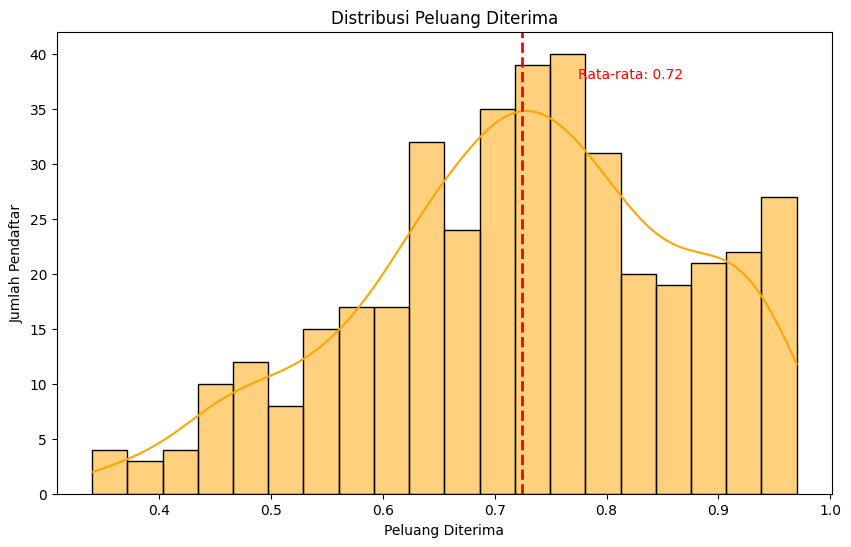


Rata-rata peluang diterima: 0.7244


In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Chance_of_Admit'], kde=True, bins=20, color='orange')

# Menghitung rata-rata
mean_chance = df['Chance_of_Admit'].mean()

# Menambahkan garis rata-rata
plt.axvline(mean_chance, color='red', linestyle='--', linewidth=2)

# Menambahkan teks nilai rata-rata
plt.text(mean_chance + 0.05, plt.ylim()[1]*0.9,
         f'Rata-rata: {mean_chance:.2f}',
         color='red', fontsize=10)

plt.title('Distribusi Peluang Diterima')
plt.xlabel('Peluang Diterima')
plt.ylabel('Jumlah Pendaftar')
plt.show()

# Menampilkan nilai mean di console juga
print(f"\nRata-rata peluang diterima: {mean_chance:.4f}")

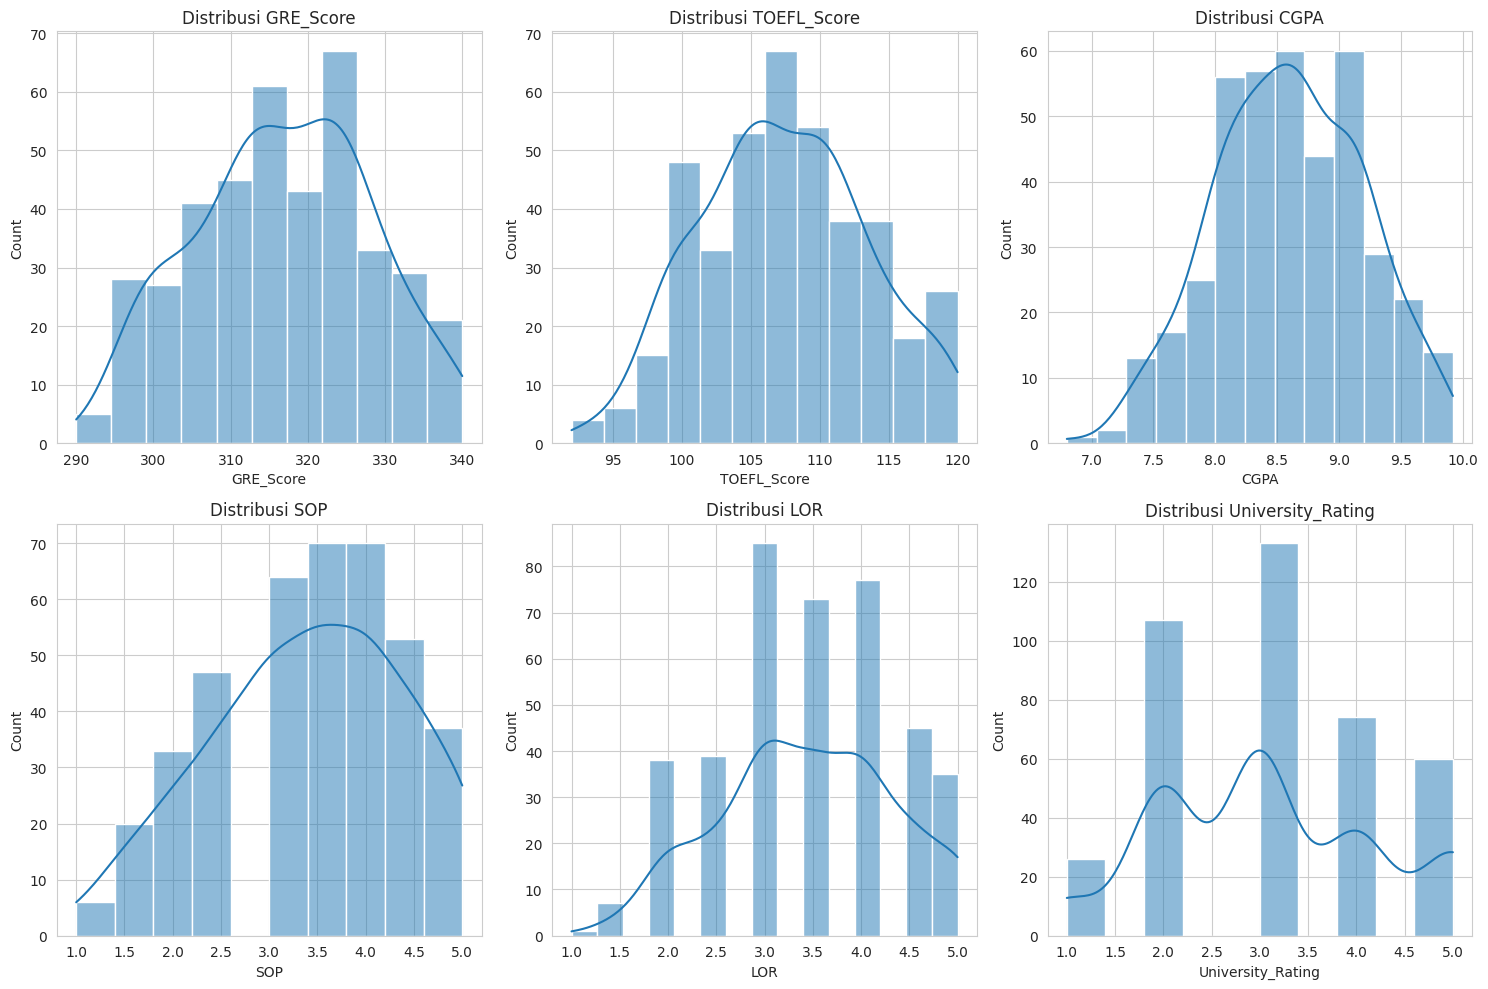

In [ ]:
numeric_features = ['GRE_Score', 'TOEFL_Score', 'CGPA', 'SOP', 'LOR', 'University_Rating']
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribusi {col}')
plt.tight_layout()
plt.show()

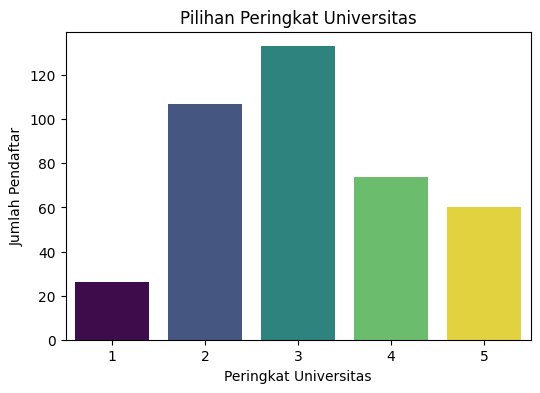

In [12]:
plt.figure(figsize=(6, 4))
sns.countplot(x='University_Rating', data=df, hue='University_Rating', palette='viridis', legend=False)
plt.title('Pilihan Peringkat Universitas')
plt.xlabel('Peringkat Universitas')
plt.ylabel('Jumlah Pendaftar')
plt.show()

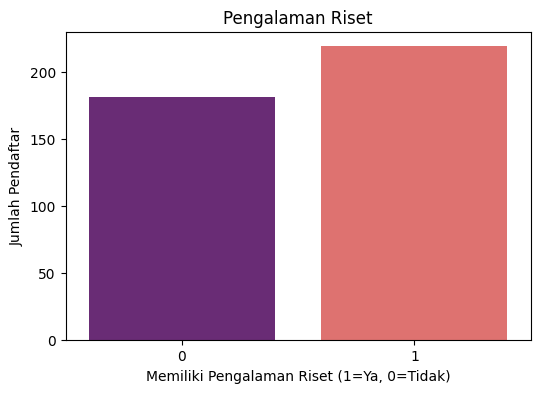

In [13]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Research', data=df, hue='Research', palette='magma', legend=False)
plt.title('Pengalaman Riset')
plt.xlabel('Memiliki Pengalaman Riset (1=Ya, 0=Tidak)')
plt.ylabel('Jumlah Pendaftar')
plt.show()

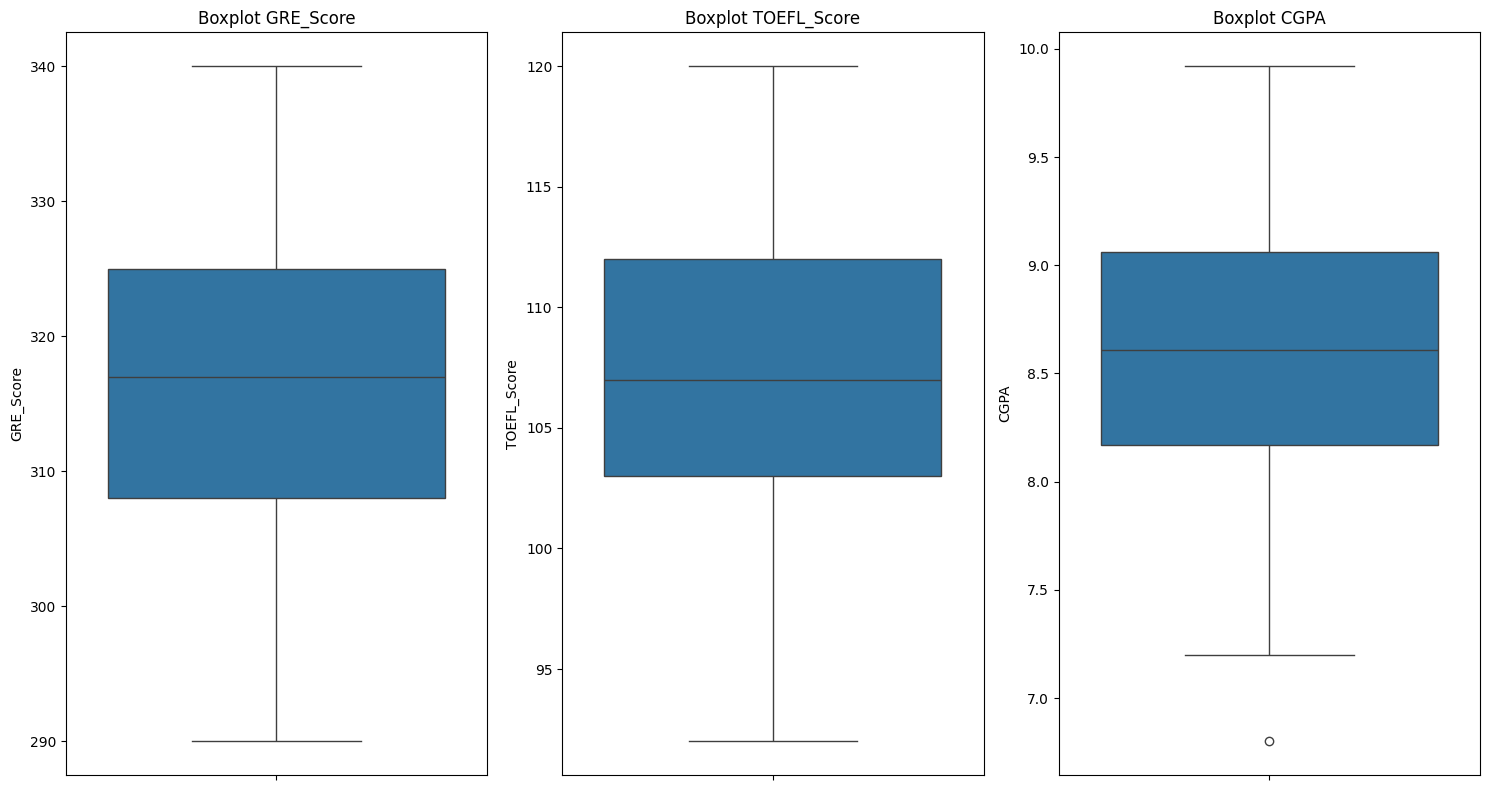

In [14]:
# 9. Outlier Detection
plt.figure(figsize=(15, 8))
for i, col in enumerate(['GRE_Score', 'TOEFL_Score', 'CGPA'], 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot {col}')
plt.tight_layout()
plt.show()

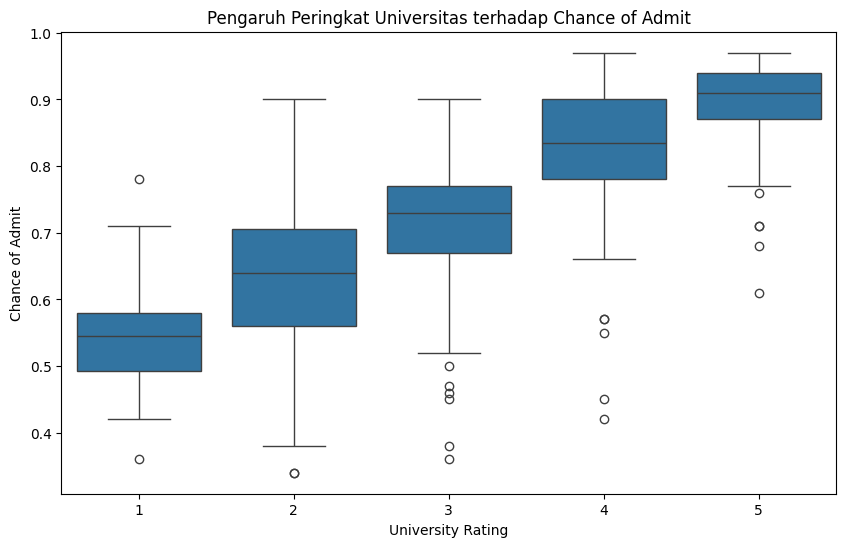

In [15]:
# 10. Analisis University Rating
plt.figure(figsize=(10, 6))
sns.boxplot(x='University_Rating', y='Chance_of_Admit', data=df)
plt.title('Pengaruh Peringkat Universitas terhadap Chance of Admit')
plt.xlabel('University Rating')
plt.ylabel('Chance of Admit')
plt.show()

## Korelasi Feature


Membuat visualisasi untuk hubungan antar fitur...


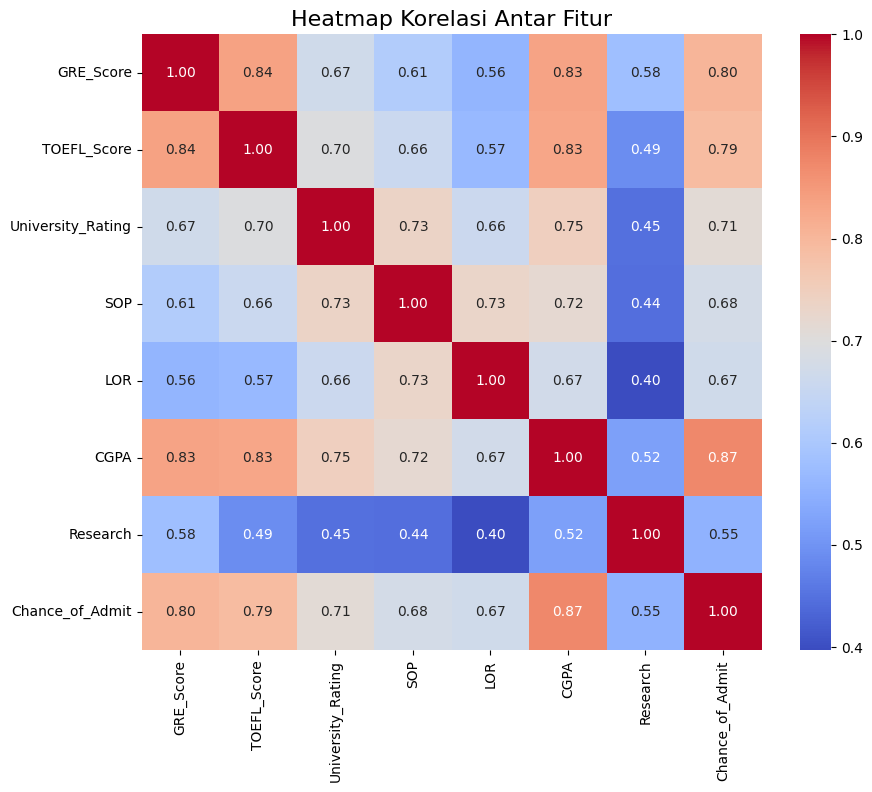

In [16]:
print("\nMembuat visualisasi untuk hubungan antar fitur...")

# 1. Heatmap Korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi Antar Fitur', fontsize=16)
plt.show()

<Figure size 1800x500 with 0 Axes>

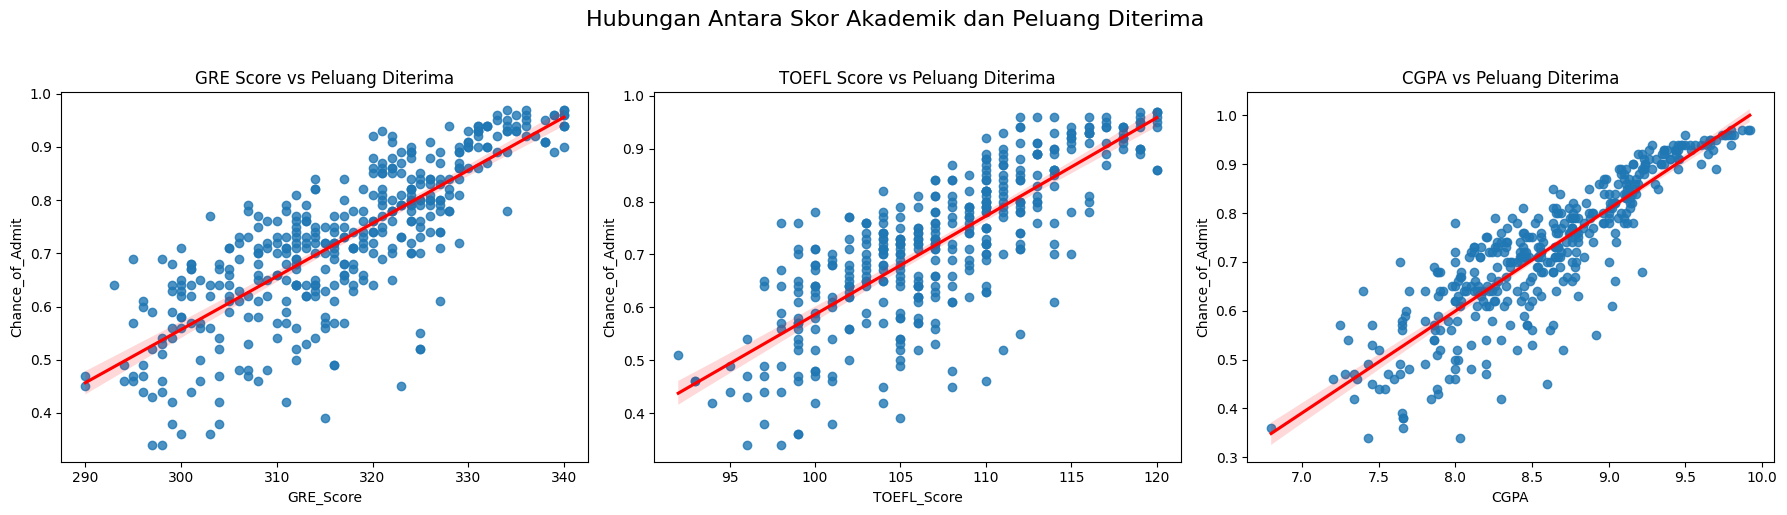

In [17]:
# 2. Scatter Plot untuk melihat hubungan lebih detail
plt.figure(figsize=(18, 5))
plt.suptitle('Hubungan Antara Skor Akademik dan Peluang Diterima', fontsize=16, y=1.02)

# 2. Scatter Plot untuk melihat hubungan lebih detail
plt.figure(figsize=(18, 5))
plt.suptitle('Hubungan Antara Skor Akademik dan Peluang Diterima', fontsize=16, y=1.02)

# Hubungan GRE Score dengan Peluang Diterima
plt.subplot(1, 3, 1)
sns.regplot(x='GRE_Score', y='Chance_of_Admit', data=df, line_kws={"color": "red"})
plt.title('GRE Score vs Peluang Diterima')

# Hubungan TOEFL Score dengan Peluang Diterima
plt.subplot(1, 3, 2)
sns.regplot(x='TOEFL_Score', y='Chance_of_Admit', data=df, line_kws={"color": "red"})
plt.title('TOEFL Score vs Peluang Diterima')

# Hubungan CGPA dengan Peluang Diterima
plt.subplot(1, 3, 3)
sns.regplot(x='CGPA', y='Chance_of_Admit', data=df, line_kws={"color": "red"})
plt.title('CGPA vs Peluang Diterima')

plt.tight_layout()
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [18]:
# 1. Membuat fungsi standarisasi fitur
def standardize_features(df, features_to_scale, scaler=None):
    """
    Fungsi untuk standarisasi fitur-fitur tertentu dalam dataframe

    Parameters:
    - df: DataFrame yang akan diproses
    - features_to_scale: List nama kolom yang akan distandarisasi
    - scaler: Scaler object (jika None, akan membuat baru)

    Returns:
    - DataFrame dengan fitur terstandarisasi
    - Scaler object yang sudah di-fit
    """
    df_scaled = df.copy()

    if scaler is None:
        scaler = StandardScaler()
        scaler.fit(df[features_to_scale])

    df_scaled[features_to_scale] = scaler.transform(df[features_to_scale])

    return df_scaled, scaler

In [19]:
# 2. Menentukan fitur yang akan distandarisasi
# Fitur numerik yang akan distandarisasi
features_to_scale = ['GRE_Score', 'TOEFL_Score', 'CGPA', 'SOP', 'LOR']
# Fitur yang tidak perlu distandarisasi (Fitur Kategori yang sudah di encoding)
other_features = ['University_Rating', 'Research']

In [20]:
# 3. Bagi data dan proses standarisasi
# Membagi data (80% training, 20% testing)
X = df.drop('Chance_of_Admit', axis=1)
y = df['Chance_of_Admit']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Standarisasi data training dan testing
X_train_scaled, scaler = standardize_features(X_train, features_to_scale)
X_test_scaled, _ = standardize_features(X_test, features_to_scale, scaler)

# Gabungkan kembali dengan fitur non-scaled dan target
train_df = pd.concat([
    X_train_scaled[features_to_scale + other_features],
    y_train.reset_index(drop=True)
], axis=1)

test_df = pd.concat([
    X_test_scaled[features_to_scale + other_features],
    y_test.reset_index(drop=True)
], axis=1)


In [21]:
# 4. Menyimpan dataset yang sudah bersih
# Membuat folder jika belum ada
os.makedirs('data_clean', exist_ok=True)

# Menyimpan sebagai CSV
train_df.to_csv('data_clean/train_clean.csv', index=False)
test_df.to_csv('data_clean/test_clean.csv', index=False)

In [22]:
# Menyimpan scaler
import joblib
joblib.dump(scaler, 'data_clean/scaler.pkl')

print("✅ Proses selesai!")
print(f"Data training tersimpan di: data_clean/train_clean.csv ({len(train_df)} baris)")
print(f"Data testing tersimpan di: data_clean/test_clean.csv ({len(test_df)} baris)")
print(f"Scaler tersimpan di: data_clean/scaler.pkl")

# Contoh output
print("\nContoh data training yang sudah diproses:")
print(train_df.head())

✅ Proses selesai!
Data training tersimpan di: data_clean/train_clean.csv (382 baris)
Data testing tersimpan di: data_clean/test_clean.csv (138 baris)
Scaler tersimpan di: data_clean/scaler.pkl

Contoh data training yang sudah diproses:
     GRE_Score  TOEFL_Score      CGPA       SOP       LOR  University_Rating  \
3     0.457111     0.424662  0.139866  0.127156 -1.059652                3.0   
18    0.102289     0.424662  0.361100  0.617396 -0.501940                3.0   
202   2.053813     2.085930  2.250095  1.107637  1.171194                5.0   
250   0.279700    -0.572099 -0.030313 -0.363084 -1.059652                3.0   
274  -0.163828    -1.236607 -1.085428 -1.343565 -1.059652                1.0   

     Research  Chance_of_Admit  
3         1.0             0.74  
18        0.0             0.59  
202       1.0             0.70  
250       1.0             0.87  
274       0.0             0.80  
